In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import networkx as nx
import dowhy
import pandas as pd
from dowhy import CausalModel

style.use('fivethirtyeight') # bmh

import math
import dowhy.datasets, dowhy.plotter

import hyppo
import pingouin as pg
import conditional_independence

from hyppo.independence import Hsic

# the code below simple hides some warnings we don't want to see
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

In [40]:
path = "/Users/dj/Documents/GitHub/Causal_Data_Science/Project/Data/lucas0_text/"
names = ['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing']

In [41]:
# reading csv files
train =  pd.read_csv(path + 'lucas0_train.data', sep=" ", header = None)
train.drop(11, inplace = True, axis = 1)
train.columns = names
test =  pd.read_csv(path + 'lucas0_test.data', sep=" ", header = None)
test.drop(11, inplace = True, axis = 1)
test.columns = names
target =  pd.read_csv(path + 'lucas0_train.targets', sep=" ", header = None)
# param =  pd.read_csv(path + 'lucas0.param', sep=" ")

In [42]:
print(train.sum().sum())
print(test.sum().sum())

11923
60290


In [43]:
print(train.shape)
print(test.shape)
print(target.shape)

(2000, 11)
(10000, 11)
(2000, 1)


In [44]:
target.head()

,0
0,-1
1,1
2,1
3,-1
4,1


In [45]:
target[target[0] == -1] = 0

In [46]:
target

,0
0,0
1,1
2,1
3,0
4,1
...,...
1995,1
1996,1
1997,1
1998,1


In [47]:
avgs = train[names].mean()

In [48]:
avgs

Smoking               0.7525
Yellow_Fingers        0.7820
Anxiety               0.6305
Peer_Pressure         0.3415
Genetics              0.1395
Attention_Disorder    0.3225
Born_an_Even_Day      0.4895
Car_Accident          0.7230
Fatigue               0.7370
Allergy               0.3430
Coughing              0.7005
dtype: float64

In [49]:
train["Lung_Cancer"] = np.array(target)

In [50]:
train.head(20)

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_Cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1
5,1,1,0,1,0,0,1,1,1,1,1,1
6,1,1,1,1,0,0,0,1,1,0,1,1
7,1,1,1,0,0,0,1,1,1,0,1,1
8,0,0,0,0,0,0,0,1,0,0,0,0
9,1,1,1,1,0,0,1,1,1,1,1,1


In [51]:
avgs = train.mean()
avgs

Smoking               0.7525
Yellow_Fingers        0.7820
Anxiety               0.6305
Peer_Pressure         0.3415
Genetics              0.1395
Attention_Disorder    0.3225
Born_an_Even_Day      0.4895
Car_Accident          0.7230
Fatigue               0.7370
Allergy               0.3430
Coughing              0.7005
Lung_Cancer           0.7215
dtype: float64

In [52]:
names.append('Lung_Cancer')

# Plotting Variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

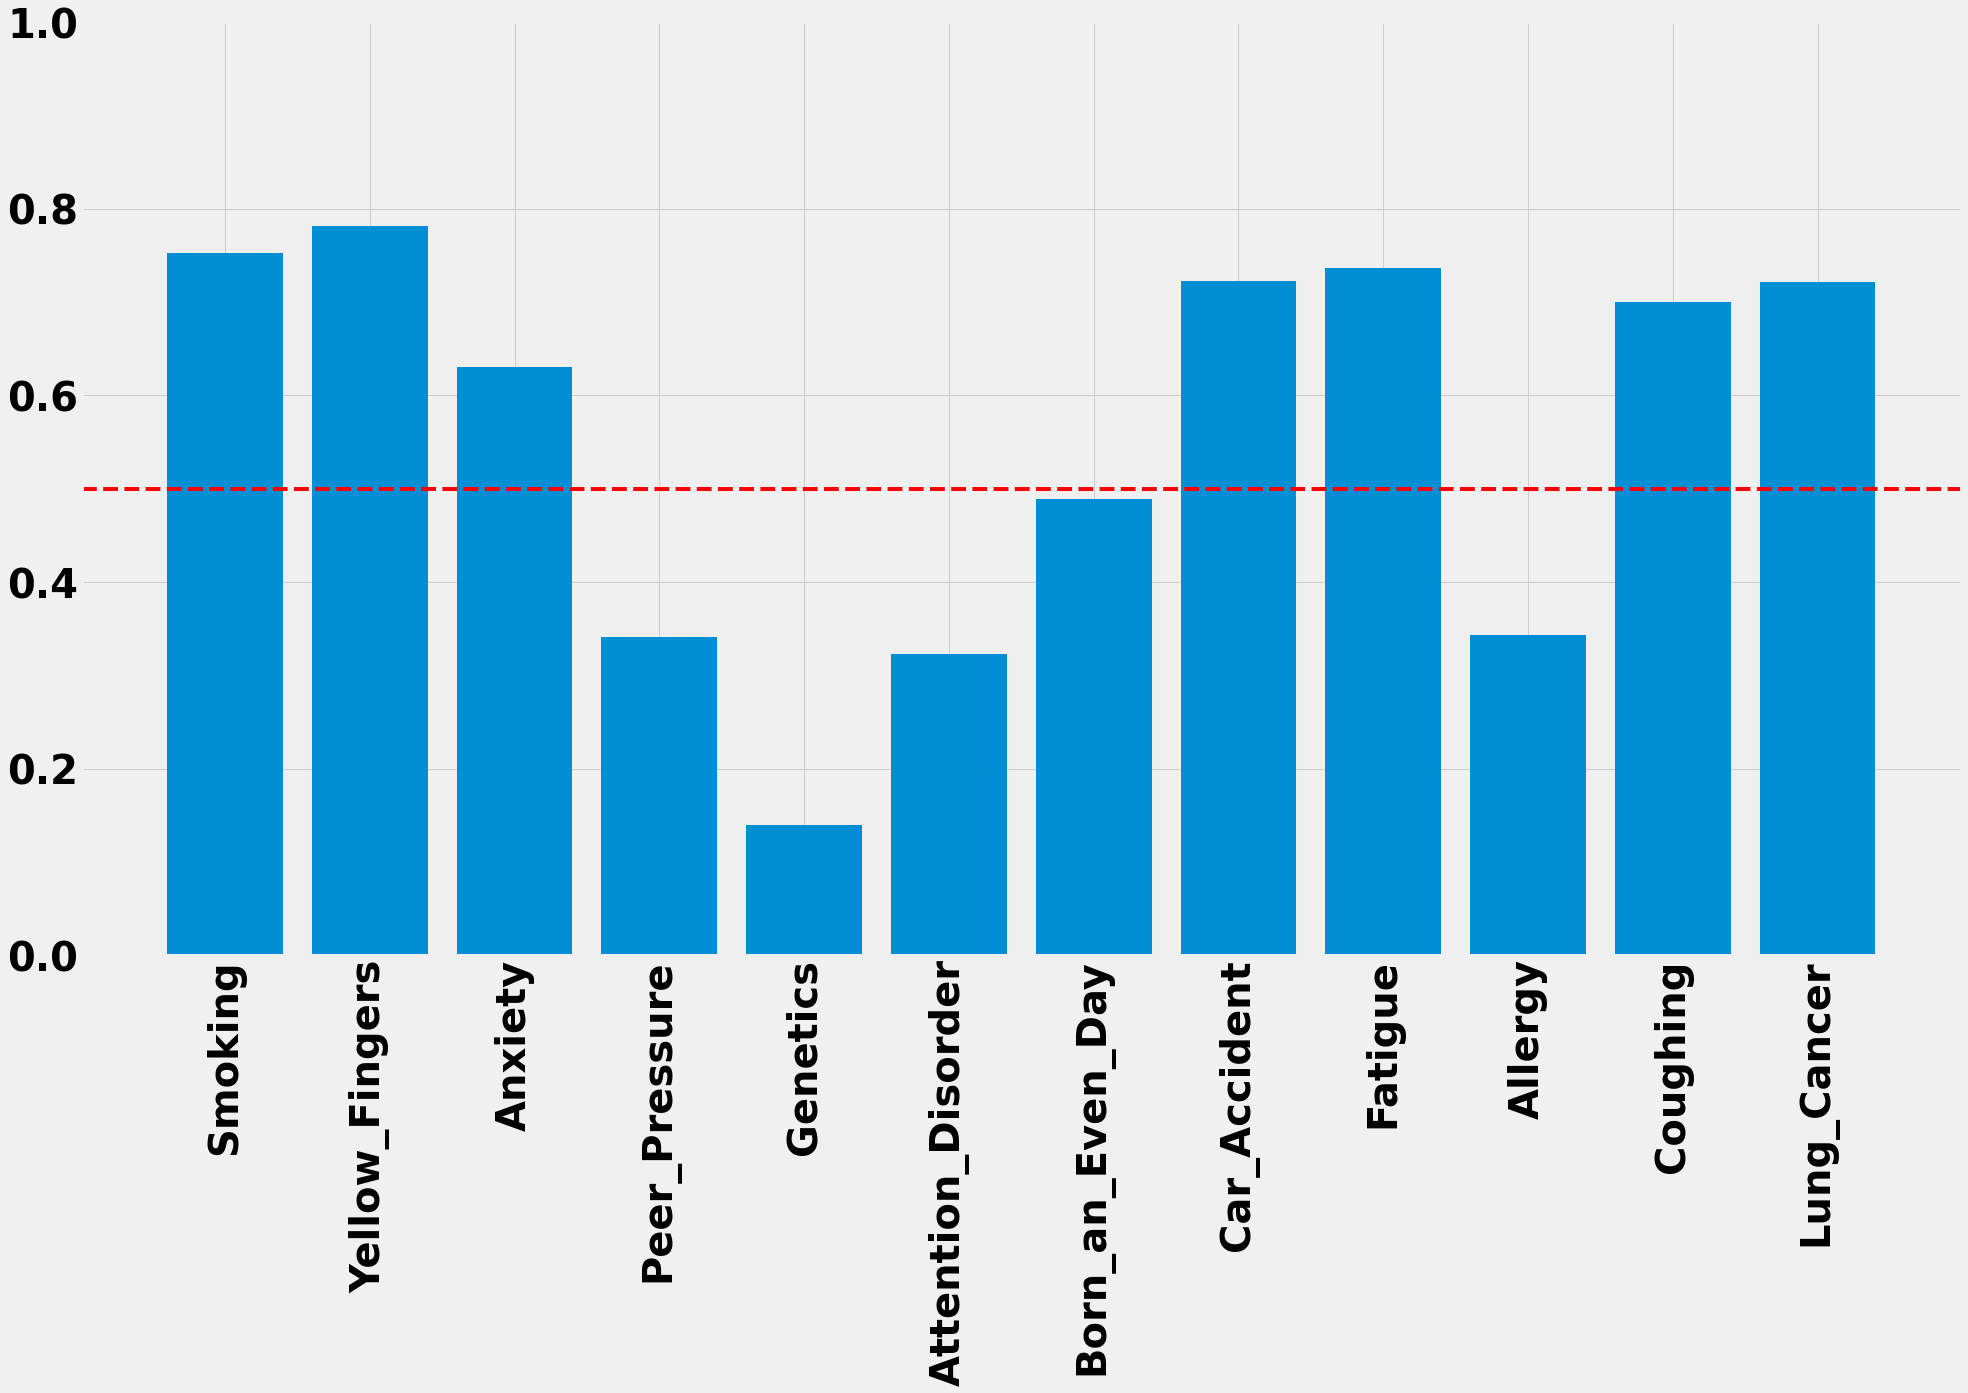

In [53]:
plt.figure(figsize=(30, 16))
plt.bar(names,avgs,  )
plt.ylim(0, 1)
plt.xticks(fontsize = 40, weight = 'bold')
plt.yticks(fontsize = 40, weight = 'bold')
plt.axhline(0.5, c='r', linestyle='--')
plt.xticks(rotation=90)

# Correlation

In [54]:
corr_df = round(train.corr(),2)

Text(0.5, 1.0, 'Correlation Heatmap')

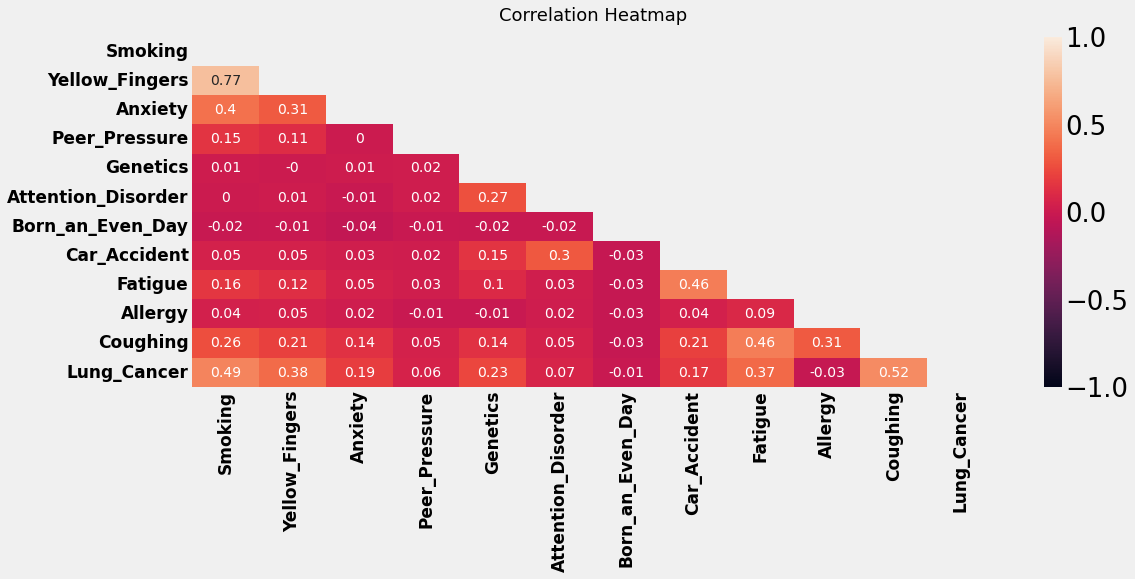

In [55]:

plt.figure(figsize=(16, 6))
plt.xticks(fontsize = 17,weight = 'bold')
plt.yticks(fontsize= 17,weight = 'bold')
mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
heatmap = sns.heatmap(corr_df, mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Contingency Table

In [56]:
#create contingency table
pd.crosstab(index=train['Coughing'], columns=train['Car_Accident'])

Car_Accident,0,1
Coughing,,
0,250,349
1,304,1097


In [57]:
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[250, 349], [304, 1097]])
round(pvalue,10)
pvalue

In [58]:
#create contingency table
pd.crosstab(index=train['Coughing'], columns=train['Fatigue'])

Fatigue,0,1
Coughing,,
0,343,256
1,183,1218


In [59]:
oddsratio, pvalue = fisher_exact([[343, 256], [183, 1218]])
round(pvalue,10)

In [60]:
import scipy.stats as stats
res = stats.barnard_exact([[250, 349], [304, 1097]])
res.statistic

res.pvalue

In [61]:
import scipy.stats as stats
res = stats.barnard_exact([[343, 256], [183, 1218]])
res.statistic

res.pvalue

In [62]:
pd.crosstab(index=train['Coughing'], columns=train['Genetics'])

Genetics,0,1
Coughing,,
0,559,40
1,1162,239


In [63]:
import scipy.stats as stats
res = stats.barnard_exact([[559, 40], [1162, 239]])
res.statistic

res.pvalue

# Graph 

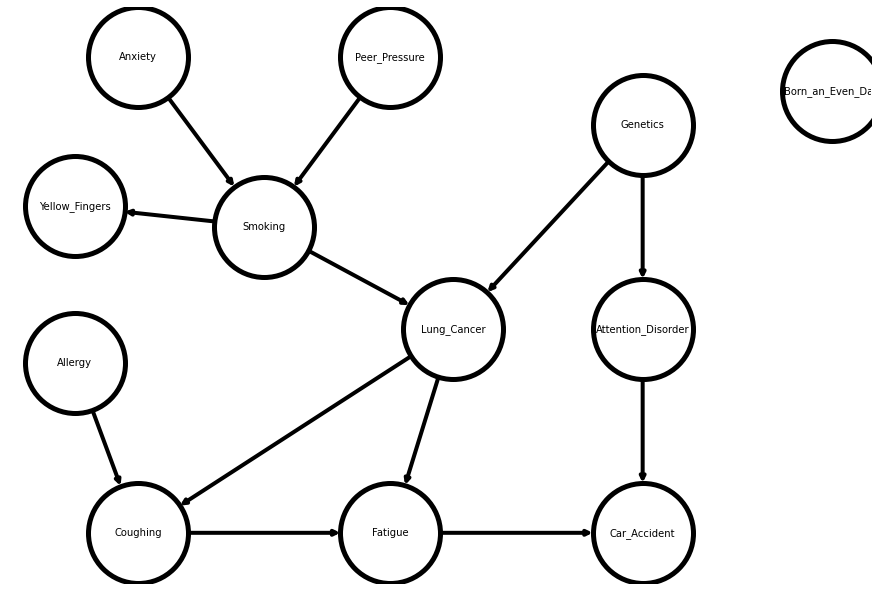

In [64]:
# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(12,8))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "backdoor_criterion_graph.gml")

plt.show()

# EDA - Tutorial 2

## Plot Treatment & Outcome

In [65]:
dowhy.plotter.plot_treatment_outcome(train["Coughing"], train["Car_Accident"], train['Target']) # Doen't make sense with binary data I guess

KeyError: 'Target'

## Step 1: Model the Problem with a Causal Graph

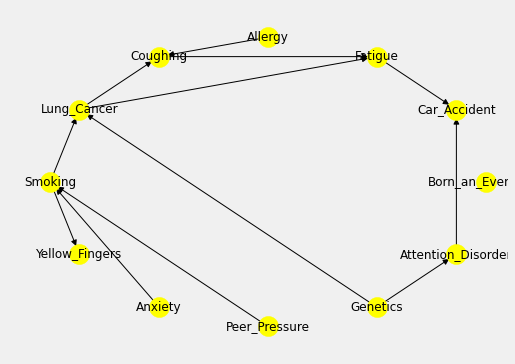

In [ ]:
from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = train,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

#display(Image(filename="backdoor_criterion_graph.png", width = 200, height = 100))

In [ ]:
(gml_graph)

'graph [  directed 1  node [    id 0    label "Smoking"  ]  node [    id 1    label "Yellow_Fingers"  ]  node [    id 2    label "Anxiety"  ]  node [    id 3    label "Peer_Pressure"  ]  node [    id 4    label "Genetics"  ]  node [    id 5    label "Attention_Disorder"  ]  node [    id 6    label "Born_an_Even_Day"  ]  node [    id 7    label "Car_Accident"  ]  node [    id 8    label "Fatigue"  ]  node [    id 9    label "Allergy"  ]  node [    id 10    label "Coughing"  ]  node [    id 11    label "Lung_Cancer"  ]  edge [    source 0    target 1  ]  edge [    source 0    target 11  ]  edge [    source 2    target 0  ]  edge [    source 3    target 0  ]  edge [    source 4    target 11  ]  edge [    source 4    target 5  ]  edge [    source 5    target 7  ]  edge [    source 8    target 7  ]  edge [    source 9    target 10  ]  edge [    source 10    target 8  ]  edge [    source 11    target 10  ]  edge [    source 11    target 8  ]]'

### STEP 2: Identify causal effect using properties of the formal causal graph


In [ ]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### STEP 3: Estimate the causal effect

Causal Estimate is None


KeyError: 'intercept'

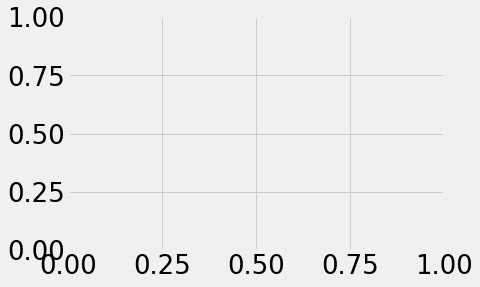

In [ ]:
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, train["Coughing"],train["Car_Accident"])

We can also get the confidence intervals

In [ ]:
estimate.get_confidence_intervals()

In [ ]:
# we assume the effect of treatment for outcome is 1
effect = 1

print("DoWhy estimate is " + str(estimate.value))
print ("Actual true causal effect was {0}".format(effect))

DoWhy estimate is 0.05284510226161476
Actual true causal effect was 1


# Step 4: Refuting the Estimate

In [ ]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.05284510226161476
New effect:0.001268817428312461
p value:0.48



Removing a random subset of the data

In [ ]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", subset_fraction=0.9)
print(res_subset)

Refute: Use a subset of data
Estimated effect:0.05284510226161476
New effect:0.05206613485355156
p value:0.47



# Independence Tests

In [ ]:
# calculate the Pearson's correlation between two variables
import numpy as np
# calculate Pearson's correlation
corr = np.corrcoef(train['Coughing'], train['Car_Accident'])[0,1]
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.205


# Non parametric Test - Hilbert Schmidt Test

In [ ]:
c_h = Hsic().test(np.array(train['Coughing']), np.array(train['Car_Accident']))
print(c_h)

IndependenceTestOutput(stat=0.04150944093981498, pvalue=4.900717658157932e-20)


### 3.B Data with conditional distribution

We then do correlation and independence tests on data with conditional distribution.

### Partial correlation with data

We use pingouin package to generate data with confoundings and then measure the partial correlation between two variables when conditioning on different covariates.

Partial correlation measures the degree of association between x and y, after removing the effect of one or more controlling variables (covar, or 𝑍).
For more implementation details see: https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
pg.corr(train['Coughing'], train['Car_Accident']) # I guess if p-val < 0.05, than the two variables are correlated to a certein degree

,n,r,CI95%,p-val,BF10,power
pearson,2000,0.205086,"[0.16, 0.25]",1.957568e-20,1.18e+17,1.0


Then we test the partial correlation with conditioning on one covariate. We can see that the correlation is gone when conditioning on z.

In [ ]:
pg.partial_corr(data=train, x='Coughing', y='Car_Accident', covar='Target').round(5)

,n,r,CI95%,p-val
pearson,2000,0.13969,"[0.1, 0.18]",0.0


The results indicate that correlation between variables may be solely the result of another variable(s). When we condition on different covariates, the partial correlation changes (and may even disappear), which give us useful information for modelling the data.

In [ ]:
import conditional_independence.ci_tests.nonparametric.hsic as cond_hsic

res = cond_hsic.hsic_test(train.to_numpy(), 0, 7, [8,11]) # i: int, j: int, cond_set: List[int] 
print(res)

{'statistic': 3.483794833292769e-05, 'p_value': 0.16600297195142166, 'reject': False, 'mean_approx': 2.047602191505199e-05, 'var_approx': 2.882677560097824e-10}


The non-significant p-value tells us that these data are independent when we condition on $z$.

In [ ]:
train.head()

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Target
0,0,0,1,0,0,1,0,1,0,1,0,-1
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,-1
4,1,1,1,0,0,1,1,1,1,0,0,1


# Binary Data Analysis

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
jaccard_score(train['Coughing'], train['Car_Accident'])

# Backdoor criterion  - Tutorial 3

In [66]:
# this function finds the descendants of node 'X' in graph G
# note that in this function they do not include 'X' as a descendant of 'X' - this is not the definition we use, so we add 'X'
nx.descendants(G,'Coughing') | {'Coughing'}

{'Car_Accident', 'Coughing', 'Fatigue'}

In [67]:
# importing the backdoor class from DoWhy
from dowhy.causal_identifiers import backdoor

# Backfor paths: A->X and Z->x could be two, X bust be at beginning and against stream

# creating a copy of our graph G that is undirected
H = G.to_undirected() # undirected path

In [68]:
# the all_simple_paths function finds all possible undirected paths between 'X' and 'Y' in graph H
# the [x for x ...] is simply to get the values from the generator
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Coughing', 'Car_Accident')] # take undirected graph and say we want to go from y -> y
all_possible_paths

[['Coughing', 'Fatigue', 'Car_Accident'],
 ['Coughing',
  'Fatigue',
  'Lung_Cancer',
  'Genetics',
  'Attention_Disorder',
  'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [69]:
# we can create a Backdoor object with G, 'X', and 'Y'
# note that we are back to using the directed graph, G, as we only needed the undirected to find the paths
graph_nodes = backdoor.Backdoor(G, 'Coughing', 'Car_Accident')

In [70]:
# we apply the is_backdoor function to each path to check if a path is a backdoor path
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]

# finally, we filter out all non-backdoor paths from the list of all paths
backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
backdoor_paths

[['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [71]:
# we create a pandas dataframe to track the path and its colliders and non-colliders
import pandas as pd
import numpy as np
adjustment_variables = pd.DataFrame(columns=['path', 'colliders_desc', 'non_colliders'])

Lets take a look at the following path:

'Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'

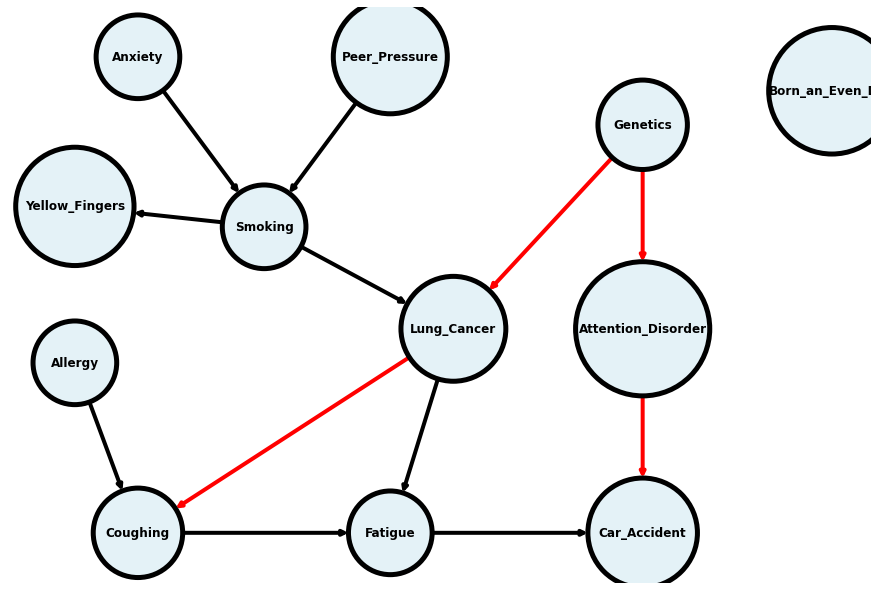

In [72]:
plt.figure(3,figsize=(12,8))

colors = ['black', 'black', 'black', 'black', 'r', 'r', 'r', 'black', 'black', 'black', 'r', 'black']
nx.draw(G, pos= pos, with_labels=True, node_size=[len(v) * 1000 for v in G.nodes()], node_color='#e4f2f7', edgecolors = 'black', edge_color =colors, linewidths= 5, width = 4, font_size = 12,  font_weight = 'bold')


plt.show()

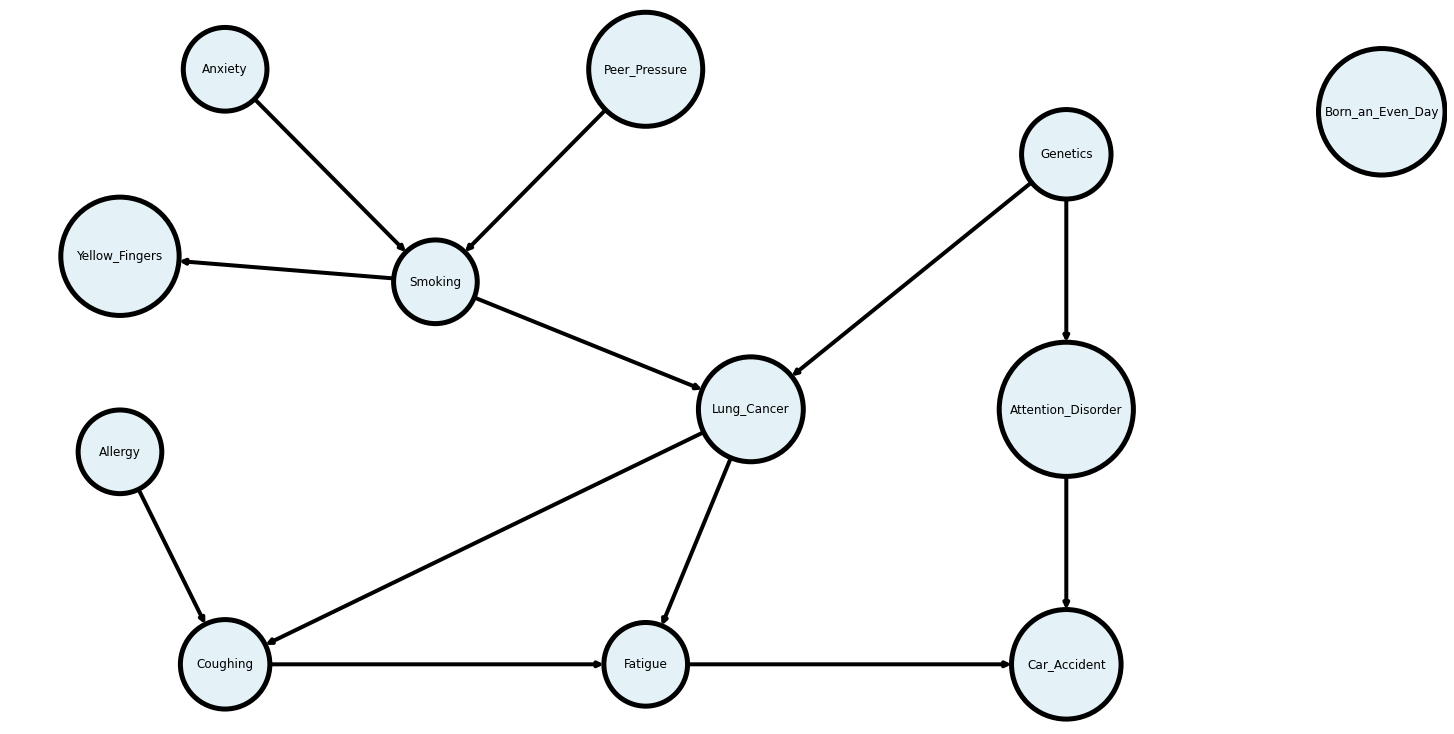

In [73]:
plt.figure(6,figsize=(20,10))

nx.draw(G, pos = pos,with_labels=True, node_size=[len(v) * 1000 for v in G.nodes()], node_color='#e4f2f7' , edgecolors ='black', linewidths= 5, width = 4, font_size = 12)
nx.write_gml(G, "backdoor_criterion_graph.gml")

plt.show()

In [74]:
# this is the path we are testing
path = ['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident']

In [75]:
# we create empty (for now) lists for our colliders and non-colliders
# we also create a variable for the length of the path
colliders_desc = np.array([])
non_colliders = []
path_len = len(path)

In [76]:
# we loop through adjacent variables on the path, ignoring the source and target variables as potential colliders
for node0, node1, node2 in zip(path[0:path_len-2], path[1:path_len-1], path[2:]):
    # if there is an arrow pointing into node1 from both sides on the path, it is a collider
    if G.has_edge(node0, node1) and G.has_edge(node2, node1):
        colliders_desc = np.append(colliders_desc, list(nx.descendants(G,node1)) + [node1]) # so we add it (and all its descendants) to the list
# we flatten the list of list
colliders_desc = colliders_desc.flatten()
print(colliders_desc)

# We see that we do not have any colliders.

[]


In [77]:
# any node on the path (excluding the source and target) that is not a collider is a non-collider
non_colliders = [x for x in path[1:-1] if x not in colliders_desc]
print(non_colliders)

# Here are the non colliders

['Lung_Cancer', 'Genetics', 'Attention_Disorder']


In [78]:
# finally, we add the information to our dataframe, with the path, colliders, and non-colliders
adjustment_variables = adjustment_variables.append({'path':path, 'colliders_desc': colliders_desc, 
                                                    'non_colliders': non_colliders}, ignore_index=True)

In [79]:
adjustment_variables

# For blocking: not condition on colliders or condition on non-colliders

,path,colliders_desc,non_colliders
0,"[Coughing, Lung_Cancer, Genetics, Attention_Di...",[],"[Lung_Cancer, Genetics, Attention_Disorder]"


### Now the same for another graph

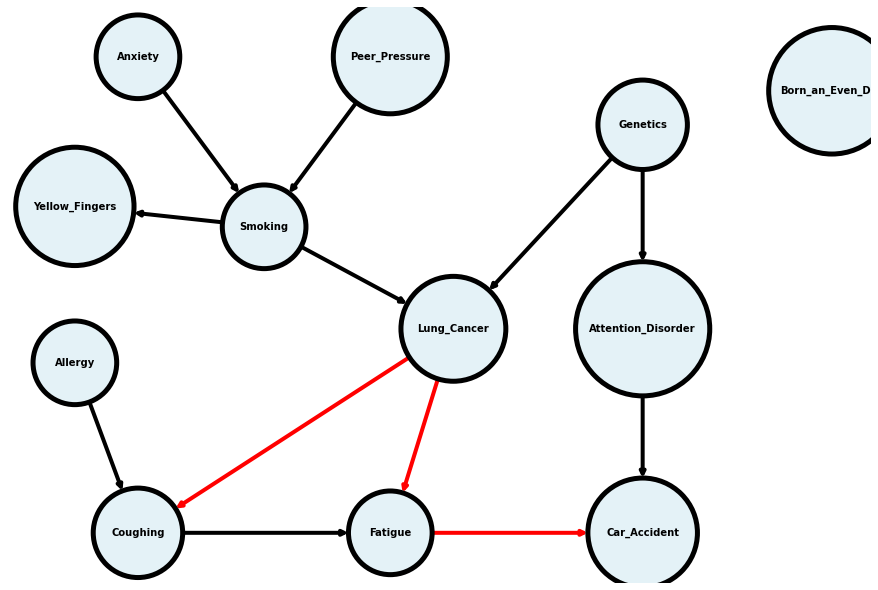

In [81]:
plt.figure(3,figsize=(12,8))

colors = ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'r', 'black', 'black', 'r', 'r']
nx.draw(G, pos= pos, with_labels=True, node_size=[len(v) * 1000 for v in G.nodes()], node_color='#e4f2f7', edgecolors = 'black', edge_color =colors,linewidths= 5, width = 4, font_size = 10, font_weight = 'bold')


plt.show()

In [149]:
# this is the path we are testing
path = ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']

# we create empty (for now) lists for our colliders and non-colliders
# we also create a variable for the length of the path
colliders_desc = np.array([])
non_colliders = []
path_len = len(path)

# we loop through adjacent variables on the path, ignoring the source and target variables as potential colliders
for node0, node1, node2 in zip(path[0:path_len-2], path[1:path_len-1], path[2:]):
    # if there is an arrow pointing into node1 from both sides on the path, it is a collider
    if G.has_edge(node0, node1) and G.has_edge(node2, node1):
        colliders_desc = np.append(colliders_desc, list(nx.descendants(G,node1)) + [node1]) # so we add it (and all its descendants) to the list
# we flatten the list of list
colliders_desc = colliders_desc.flatten()
        
# any node on the path (excluding the source and target) that is not a collider is a non-collider
non_colliders = [x for x in path[1:-1] if x not in colliders_desc]

# finally, we add the information to our dataframe, with the path, colliders, and non-colliders
adjustment_variables = adjustment_variables.append({'path':path, 'colliders_desc': colliders_desc, 
                                                    'non_colliders': non_colliders}, ignore_index=True)

adjustment_variables

,path,colliders_desc,non_colliders
0,"[Coughing, Lung_Cancer, Genetics, Attention_Di...",[],"[Lung_Cancer, Genetics, Attention_Disorder]"
1,"[Coughing, Lung_Cancer, Fatigue, Car_Accident]",[],"[Lung_Cancer, Fatigue]"


# Same, but now with DoWhy

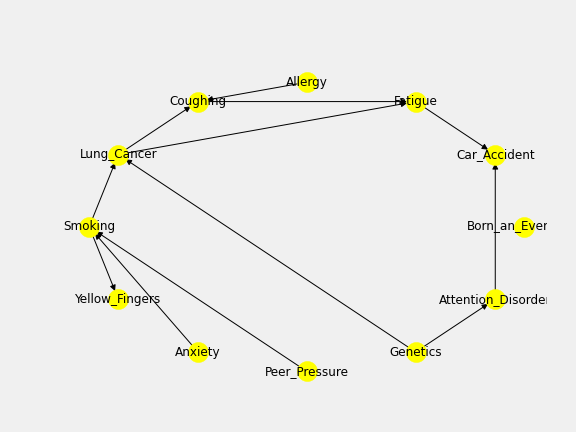

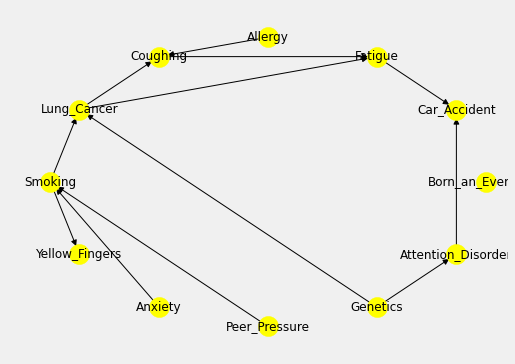

In [150]:
import dowhy
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

display(Image(filename="causal_model.png", width = 200, height = 100))

In [151]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [152]:
identifier = model.identifier
identifier.identify_backdoor(identifier.treatment_name, identifier.outcome_name) # Here we see all the calid backdoor_sets

[{'backdoor_set': ('Attention_Disorder',
   'Peer_Pressure',
   'Lung_Cancer',
   'Yellow_Fingers',
   'Smoking',
   'Anxiety',
   'Allergy',
   'Genetics')},
 {'backdoor_set': ('Lung_Cancer',)}]

# Frontdoor criterion

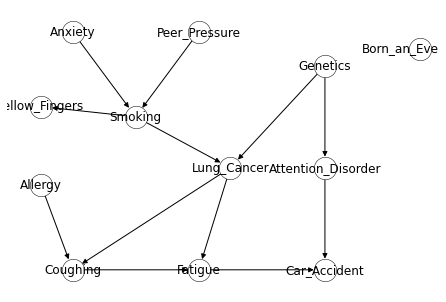

In [95]:
# we import networkx and create a directed graph
import networkx as nx
G = nx.DiGraph()

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35),}


nx.draw(G, pos= pos, with_labels=True, node_size=500, node_color='w', edgecolors ='black')
nx.write_gml(G, "frontdoor_lungs.gml")

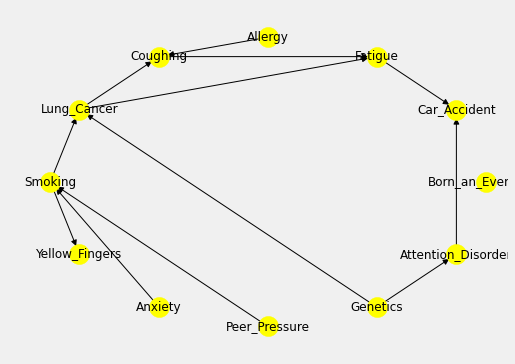

In [66]:
import dowhy
import pandas as pd
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

In [67]:
# we extract the CausalGraph object from our CausalModel object
our_causal_graph = model._graph

In [68]:
model._graph

In [69]:
# function for finding all directed paths between the two nodes given
our_causal_graph.get_all_directed_paths('Coughing', 'Car_Accident')

NodeNotFound: source node C not in graph

In [70]:
# creating a copy of our graph G that is undirected
H = G.to_undirected() # undirected path
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Coughing', 'Car_Accident')] # take undirected graph and say we want to go from y -> y
graph_nodes = backdoor.Backdoor(G, 'Coughing', 'Car_Accident')
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]
x_w_backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
x_w_backdoor_paths

[['Coughing', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident'],
 ['Coughing', 'Lung_Cancer', 'Fatigue', 'Car_Accident']]

In [71]:
# list for keeping track of which paths are blocked
path_is_blocked = []

# looping through the backdoor paths from X to W
for path in x_w_backdoor_paths:
    # the is_blocked function checks with a path is blocked when conditioning on the set conditioned_nodes
    # in this case, we are not conditioning on any nodes, so give it the empty set
    path_is_blocked.append(our_causal_graph.is_blocked(path, conditioned_nodes = [])) # not condition on anything in this case

path_is_blocked

[False, False]

In [72]:
#w_y_backdoor_paths = our_causal_graph.get_backdoor_paths('Fatigue', 'Car_Accident')
#w_y_backdoor_paths

In [73]:
all_possible_paths = [x for x in nx.all_simple_paths(H, 'Fatigue', 'Car_Accident')] # take undirected graph and say we want to go from y -> y
graph_nodes = backdoor.Backdoor(G, 'Fatigue', 'Car_Accident')
backdoor_paths_idx = [graph_nodes.is_backdoor(x) for x in all_possible_paths]
w_y_backdoor_paths = [i for indx,i in enumerate(all_possible_paths) if backdoor_paths_idx[indx]]
w_y_backdoor_paths

[['Fatigue',
  'Coughing',
  'Lung_Cancer',
  'Genetics',
  'Attention_Disorder',
  'Car_Accident'],
 ['Fatigue', 'Lung_Cancer', 'Genetics', 'Attention_Disorder', 'Car_Accident']]

In [74]:
# list for keeping track of which paths are blocked
path_is_blocked = []

# looping through the backdoor paths from W to Y
for path in w_y_backdoor_paths:
    # the is_blocked function checks with a path is blocked when conditioning on the set conditioned_nodes
    # in this case, we are conditioning on the set [X]
    path_is_blocked.append(our_causal_graph.is_blocked(path, conditioned_nodes = ['Coughing']))

path_is_blocked

[True, False]

We can see that not all paths are blocked by $Coughing$. Thus, the set {$W$} does not meet the frontdoor criterion and is not a valid adjustment set for measuring the effect of $Coughing$ on $Car_Accident$.

Now in dowhy

In [75]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Instrumental variables

Peer_Pressure -> Smoking -> Yellow_Fingers

Peer_Pressure is the instrumental variable in this case

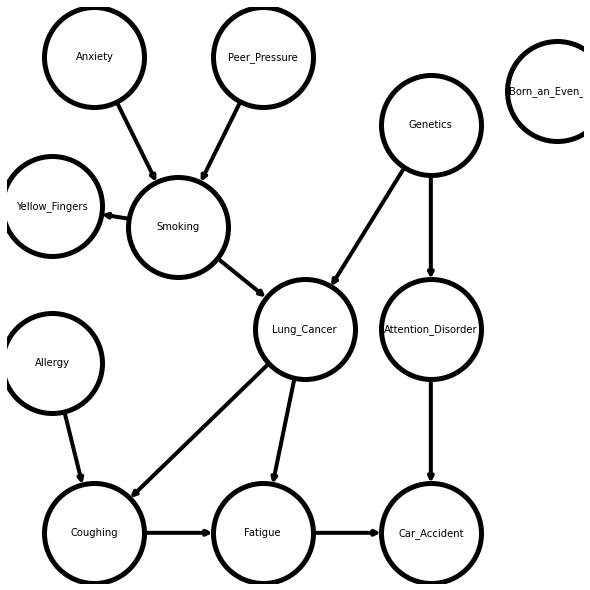

In [59]:
import numpy as np

# we import networkx and create a directed graph
G = nx.DiGraph()

plt.figure(3,figsize=(8,8))

G.add_nodes_from(['Smoking', 'Yellow_Fingers', 'Anxiety', 'Peer_Pressure', 'Genetics', 'Attention_Disorder','Born_an_Even_Day', 'Car_Accident', 'Fatigue', 'Allergy', 'Coughing', 'Lung_Cancer'])

G.add_edges_from([('Anxiety','Smoking'), ('Peer_Pressure','Smoking'), ('Smoking','Yellow_Fingers'), ('Smoking','Lung_Cancer'), 
                  ('Allergy','Coughing'), ('Lung_Cancer','Coughing'), ('Coughing','Fatigue'), ('Lung_Cancer','Fatigue'),
                 ('Genetics','Lung_Cancer'), ('Genetics','Attention_Disorder'), ('Attention_Disorder', 'Car_Accident'), ('Fatigue', 'Car_Accident')])

# we can visualise this graph (choosing node positions, colours, and sizes to make it more clear) 
# and save it to a .gml format (for using DoWhy later)
pos = {'Anxiety': (-20, 40),              'Yellow_Fingers': (-25, 18),
         'Peer_Pressure': (0, 40), 'Smoking': (-10, 15), 'Allergy': (-25, -5),
         'Coughing': (-20, -30), 'Lung_Cancer': (5, 0), 'Genetics': (20, 30), 'Attention_Disorder': (20, 0),
         'Fatigue': (0, -30),'Car_Accident': (20, -30), 'Born_an_Even_Day' : (35,35)}

nx.draw(G, pos = pos,with_labels=True, node_size=10000, node_color='w', edgecolors ='black', linewidths= 5, width = 4, font_size = 10)
nx.write_gml(G, "instrumental_variables_graph.gml")

plt.show()

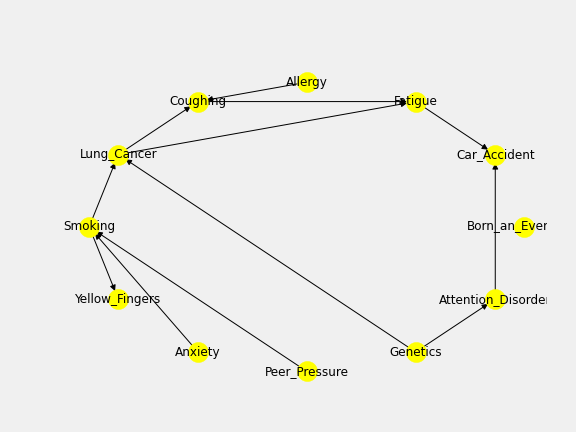

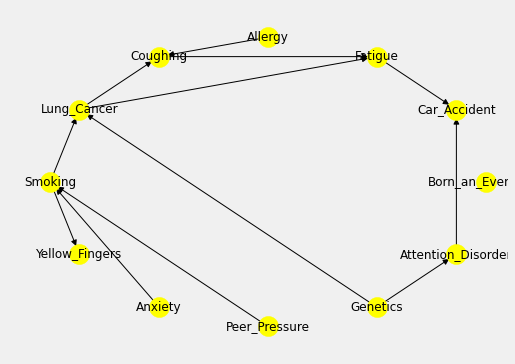

In [76]:
# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
model=CausalModel(
        data = train,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
        
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [77]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
No such variable(s) found!

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



# Estimating Causal Effects

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



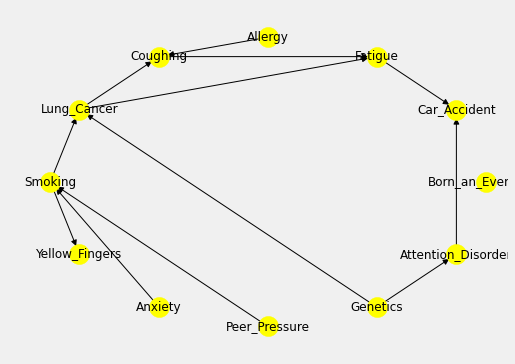

In [14]:
import dowhy
import pandas as pd
from dowhy import CausalModel

# creating arbitrary data
df = pd.DataFrame({'Smoking':[1],'Yellow_Fingers':[1],'Anxiety':[1],'Peer_Pressure':[1],'Genetics':[1],'Attention_Disorder':[1],
                  'Born_an_Even_Day': [1], 'Car_Accident': [1],
                  'Fatigue': [1], 'Allergy': [1],
                  'Coughing': [1], 'Lung_Cancer': [1]})

# a utility function to parse the .gml file to string
def gml_to_string(file):
    gml_str = ''
    with open(file, 'r') as file:
        for line in file:
            gml_str += line.rstrip()
    return gml_str

from IPython.display import Image, display

gml_graph = gml_to_string('backdoor_criterion_graph.gml')
# With GML string
model=CausalModel(
        data = df,
        treatment='Coughing',
        outcome='Car_Accident',
        graph=gml_graph
        )
model.view_model()

identified_estimand = model.identify_effect()
print(identified_estimand)

In [15]:
identified_estimand = model.identify_effect()
print(identified_estimand) 


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(Expectation(Car_Accident|Lung_Cancer))
d[Coughing]                                       
Estimand assumption 1, Unconfoundedness: If U→{Coughing} and U→Car_Accident then P(Car_Accident|Coughing,Lung_Cancer,U) = P(Car_Accident|Coughing,Lung_Cancer)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(Car_Accident, [Allergy])*Derivative([Coughing], [Allerg
y])**(-1))
Estimand assumption 1, As-if-random: If U→→Car_Accident then ¬(U →→{Allergy})
Estimand assumption 2, Exclusion: If we remove {Allergy}→{Coughing}, then ¬({Allergy}→Car_Accident)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



Let's use the set identified by the backdoor criterion. We can thus estimate the effect of v0 on y when we condition on W0, W1, W2, W3, and W4.

Let's first try estimate the effect without conditioning on these extra variables. Suppose we expect (know) that the effect is linear. We can then apply a linear estimator to find the effect. We will use linear regression.

In [16]:
# we first use only v0 and y
# we need to reshape them into the correct shape for our linear regression function
v0_vals = train['Coughing'].values.reshape(len(train['Coughing']), 1)
y_vals = train['Car_Accident'].values.reshape(len(train['Car_Accident']), 1) # Predcition

In [17]:
# we import the LinearRegression object from sklearn
from sklearn.linear_model import LinearRegression

# we fit a linear regression model with v0 and y, and check what the estimated linear effect is
linear_regressor = LinearRegression() 
linear_regressor.fit(v0_vals, y_vals)
linear_regressor.coef_ # We see that this is not correct, it is too small!

array([[0.2003744]])

I think this is pretty accurate and not that much biased. Smoking and Yellow_Fingers have roughly the same mean, which is around 0.74. Therefore, this value could be quite good. But I'll continue anyways as proposed in the tutorial 4. 

In [18]:
# we first collect the extra variables we wish to include
W0_vals = train['Target'].values.reshape(len(train['Target']), 1)

# we need to combine all of the variables we're including into one array
v0_W0_W1_vals = np.concatenate((v0_vals, W0_vals), axis = 1)
v0_W0_W1_vals

array([[0, 0],
       [1, 1],
       [1, 1],
       ...,
       [0, 1],
       [1, 1],
       [1, 1]])

In [19]:
# we fit the linear regression with the extra variables included
linear_regressor.fit(v0_W0_W1_vals, y_vals)
linear_regressor.coef_

array([[0.15712428, 0.08553048]])

We see that our estimate (the first coeffcient) looks still not biased. Looks pretty good. Now, we try using the correct conditioning set. 

In [159]:
W2_vals = train['Fatigue'].values.reshape(len(train['Fatigue']), 1)
# W4 is a categorical value, so we use the pandas' get_dummy function to turn it into dummy variables
W4_vals = pd.get_dummies(train['Coughing'].values).iloc[:,1:4]

backdoor_vars = np.concatenate((v0_vals, W0_vals, W2_vals, W4_vals), axis = 1)
backdoor_vars

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [0, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [160]:
linear_regressor.fit(backdoor_vars, y_vals)
linear_regressor.coef_ # Still looks good! First value still looks pretty close to the mean. 

array([[-4.13072067e+13,  0.00000000e+00,  4.72656250e-01,
         4.13072067e+13]])

Now our estimate (the first coefficient) is unbiased. So we would thus correctly conclude that our linear causal effect is 10.

DoWhy allows you to estimate causal effects using different estimators based on the adjustment sets it identifies. We can do what we did above by calling the estimate_effect function on our identified_estimand and specifying which criterion we wish to use, and which estimator. The different estimators you can use are available here: https://github.com/microsoft/dowhy/tree/master/dowhy/causal_estimators. When calling the estimator, exclude the '_estimator' at the end.

Below, we specify we want to use the adjustment set from the backdoor criterion and a linear regression estimator.

In [20]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

ValueError: resids must contain at least 2 elements

We see that we get the same estimate as when we performed the procedure manually. Let's try one other backdoor estimator and an instrumental variable estimator.

In [86]:
# using the backdoor adjustment set and propensity score stratification
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

Exception: Propensity score methods are applicable only for binary treatments

In [ ]:
# using the instrumental variables
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable") # iv.linear_regression
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

                          IV2SLS Regression Results                           
Dep. Variable:         Yellow_Fingers   R-squared:                       0.896
Model:                         IV2SLS   Adj. R-squared:                  0.896
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Tue, 01 Mar 2022                                         
Time:                        09:28:27                                         
No. Observations:                2000                                         
Df Residuals:                    1999                                         
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Smoking        0.9963      0.009    113.565      0.0

Not every estimator will always give a good estimate. This depends on the true nature of the effect (linear, exponential, etc.), and the assumptions made by the estimator. We can do this one correctly using the IV notebook shown by Sara in class which implements 2SLS.

In [ ]:
# we define a function to extract our linear regression coefficient
def linear_coeff(X,Y):
    linear_regressor = LinearRegression() 
    linear_regressor.fit(X, Y)
    return linear_regressor.coef_

In [ ]:
# we reshape the variables we are going to use (Z1 is a sufficient instrumental variable)
v0 = train['Smoking'].values.reshape(-1,1)
z1 = train['Anxiety'].values.reshape(-1,1)
y = train['Yellow_Fingers'].values.reshape(-1,1)

In [ ]:
# we can calculate the linear effect that Z1 has on v0, and what our estimated linear v0 values are
vhat = linear_coeff(z1, v0) * z1

In [ ]:
# we can finally calculate the linear effect of vhat on y
linear_coeff(vhat, y)

array([[0.73548677]])